<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analogous to task 5, but predicting continuous subject age with sklearn.neighbors.KNeighborsRegressor from Craddock region atlas (.scorr_mean).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 7.6 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 881262592 of 905208634 bytes (97.4%,    0.6s remaining) ...done. (22 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/64ec9dc239add5cb58c7248a4136b852/craddock_2011_parcellations.tar.gz..... done.


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# We prepare the models with the required parameters
ridge = Ridge(max_iter=1e4)
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# We create the iterating variables (sub-partitions of ROIs)
r_var = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
ridge_tr_acc = []
knn_tr_acc = []

ridge_test_acc = []
knn_test_acc = []

In [ ]:
for x in r_var:

    X, y = input_variables, output_variable
    X = X[:,list(range(0,(x)))]
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=(0.2), shuffle=False)

    RidgeReg = ridge.fit(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    ridge_tr_acc.append(score_R) # We store the scores
    print('Ridge training accuracy (coefficient of determination): %.2f' % ((score_R))) # We print the scores

    kNN = knn.fit(X_train,y_train) # We fit the kNN training model
    score_k = kNN.score(X_train, y_train)
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy (coefficient of determination): %.2f' % ((score_k))) # We print the scores

    yhat_R = ridge.predict(X_test) # We define the ridge model and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) 
    ridge_test_acc.append(score_Rt)
    print('Ridge test accuracy (coefficient of determination): %.2f' % ((score_Rt))) # We print the scores

    yhat_k = knn.predict(X_test) # We define the kNN model and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy (coefficient of determination): %.2f' % ((score_k))) # We print the scores

Ridge training accuracy (coefficient of determination): 0.38
kNN training accuracy (coefficient of determination): 0.53
Ridge test accuracy (coefficient of determination): -0.08
kNN test accuracy (coefficient of determination): 0.05
Ridge training accuracy (coefficient of determination): 0.59
kNN training accuracy (coefficient of determination): 0.53
Ridge test accuracy (coefficient of determination): 0.04
kNN test accuracy (coefficient of determination): -0.04
Ridge training accuracy (coefficient of determination): 0.75
kNN training accuracy (coefficient of determination): 0.66
Ridge test accuracy (coefficient of determination): -0.23
kNN test accuracy (coefficient of determination): -0.07
Ridge training accuracy (coefficient of determination): 0.85
kNN training accuracy (coefficient of determination): 0.65
Ridge test accuracy (coefficient of determination): -0.03
kNN test accuracy (coefficient of determination): -0.21
Ridge training accuracy (coefficient of determination): 0.91
kNN t

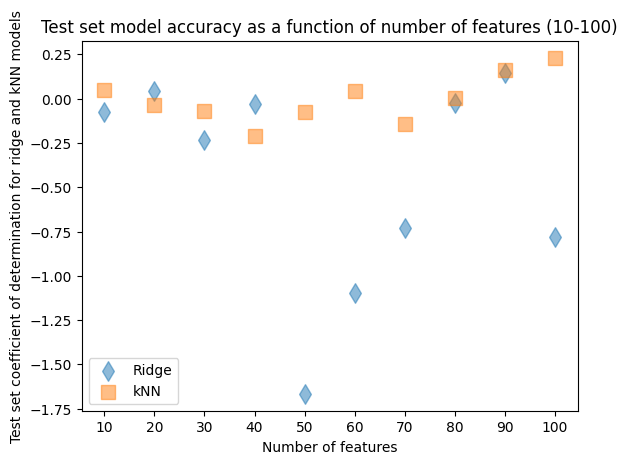

In [ ]:
# We're ready to plot
lab = ['Ridge', 'kNN']
plt.style.use("default")
plt.scatter(r_var,ridge_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(r_var,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.legend(labels=(lab))
plt.gca().set(
    title="Test set model accuracy as a function of number of features (10-100)",
    xlabel="Number of features",
    ylabel="Test set coefficient of determination for ridge and kNN models",
    xticks = (r_var)
)
plt.show()

In general, we see that kNN with k-neighbours = 3 mostly outperforms (or at least ties with) ridge regression, irrespective of the number of features. This is especially apparent beyond 50 features, where ridge drops in accuracy at first and then goes back up, whereas kNN stays constant. It would seem that ridge regression is much more affected by the number of features than kNN, at least in this example.